In [3]:
import pickle

import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
from matplotlib.lines import Line2D

from scipy.integrate import simpson
from numpy import trapz
import statistics as st

In [52]:
cmap = matplotlib.cm.get_cmap('Set3')
classes = ['airplane', 'bear', 'bicycle', 'bird', 'boat', 'bottle', 'car', 'cat', 'chair', 'clock', 'dog', 'elephant', 'keyboard', 'knife', 'oven', 'truck' ]
n = len(classes)
target_class_num = 4
mean_flag = False
k = 10
classes += ['all']

In [53]:
def get_sorted_k_space(neighbours):
    
    index   = []
    length1 = []
    length2 = []
    clss    = []
    
    binary_neighbours = []
    
    for i, v in enumerate(neighbours):
        
        index.extend([i])
        
        cls = v[0]
        
        xs = []
        vs = [v[i:] for i in range(1, k+1)]
        
        for ix in range(1, k+1):
            x = np.where(list(map(lambda *args: cls not in args, *vs[:ix])))[0]
            xs.append(0 if len(x) == 0 else x[0])
        
        length1.append(xs)
        clss.extend([v[xs[0]+1]])
        
        xs = []
        vs = [v[i:] for i in range(1, k+1)]
        
        for ix in range(1, k+1):
            x = np.where(list(map(lambda *args: cls != st.mode(args), *vs[:ix])))[0]
            xs.append(0 if len(x) == 0 else x[0])
        
        length2.append(xs)
        
        # if np.bincount(v[:500].astype(int)).argmax() != i:
        #     x = -1*(9999 + np.bincount(v[:500].astype(int)).argmax() + x)
        
        binary_neighbours.append(np.where(v == cls, 1, 0))
    
    length1 = np.array(length1)
    length2 = np.array(length2)
    binary_neighbours = np.array(binary_neighbours)
    
    values = {'index':index,  'class':clss}
    
    for i in range(len(xs)):
        values[f"length1_{i+1}"]  = list(length1[:, i])
        values[f"length2_{i+1}"] = list(length2[:, i])
    
    values[f"length1_mean"] = list(length1.mean(axis=1))
    values[f"length2_mean"] = list(length2.mean(axis=1))
    
    df = pd.DataFrame(values).sort_values(['length1_1', 'class'], ascending = [True, True])
    sort_list = df['index'].tolist()
    
    return neighbours[sort_list], binary_neighbours[sort_list], df

In [54]:
def run_forAnalysis(test_name, model_name, train_name):
    
    load_path = f'./neighbor_dict/{test_name}_to_{model_name}-{train_name}_neighbors_dict.pkl'
    with open(load_path, mode='rb') as f:
        v_dicts = pickle.load(f)

#     load_path = f'./prediction_dict/{test_name}_to_{model_name}-{train_name}_prediction_dict.pkl'
#     with open(load_path, mode='rb') as f:
#         p_dicts = pickle.load(f)

    fig = plt.figure(2, figsize=(8*target_class_num, 8))
    axes = fig.subplots(nrows=1, ncols=target_class_num)
    
    def plot_one(df, length_name, ax, th, mark, i):
        
        color = th - 1 if type(th) == int else 11
        length = df[f"{length_name}_{th}"].tolist()[::-1]
        sorted_length = sorted(length, reverse=True)
        num_elements = len(length)

        # Compute the area using the composite trapezoidal rule.
        # area = trapz(sorted_length, dx=1)
        # Compute the area using the composite Simpson's rule.
        # area = simpson(sorted_length, dx=1)

#         axes[i].plot(length, np.arange(1, num_elements + 1), 'k')
#         axes[i].fill_betweenx(np.arange(1, num_elements + 1), length, np.ones(num_elements), color=cmap(color))
#         axes[i].set(title=f"CBD: {np.mean(length):.2f}±{np.std(length):.2f}", xlabel="Cluster Boundary Distance")
        
#         print(cmap(color))
        axes[i].plot(sorted_length, np.arange(1, num_elements + 1), 'k')
        axes[i].fill_betweenx(np.arange(1, num_elements + 1), sorted_length, np.ones(num_elements), color=cmap(color))
        axes[i].set(xlabel="Cluster Boundary Distance", ylabel="Number of Points")

        
    
    def plot(i, space, bin_space, df):
#         axes[i][0].imshow(space[:, :100], cmap="tab20", aspect="auto")
#         axes[i][0].set(title=f"Class: {classes[i]}", xlabel="k-Neighbour", yticks=[],)
        
#         axes[i][1].imshow(bin_space[:, :100], cmap="Accent_r", aspect="auto")
#         axes[i][1].set(title=f"Class: {classes[i]}", xlabel="k-Neighbour", yticks=[],)

        for th in reversed(range(1, 11)):
            plot_one(df, "length1", 2, th, "*", i)
#             plot_one(df, "length2", 6, th, "+", i)
        
        plot_one(df, "length1", 4, "mean", "*", i)
#         plot_one(df, "length2", 8, "mean", "+", i)
        
        
    ### MAIN
    for i in range(target_class_num):
        legend_elements = []
        
        mark = "*"
        
        if mean_flag == False:
            for th in range(1, 11):
                legend_elements.append(Line2D([0], [0], color=cmap(th-1), lw=4, label=f"$k_{{{th}}}^{mark}$"))
        else:
            legend_elements.append(Line2D([0], [0], color=cmap(11), lw=4, label=f"$k_{{mean}}^{mark}$"))
        
        axes[i].legend(handles=legend_elements, loc='upper right')
    
    
    for i, c in zip(list(range(target_class_num)), classes[:target_class_num]):
        
        class_points = v_dicts[c]
        plot(i, *get_sorted_k_space(class_points))
    
        
    fig.tight_layout()
    fig.show()
#     fig.savefig(f"./plots/{test_name}_to_{model_name}-{train_name} k-Space.png", dpi=300)
#     fig.clear()

/tmp/ipykernel_14272/3396277706.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


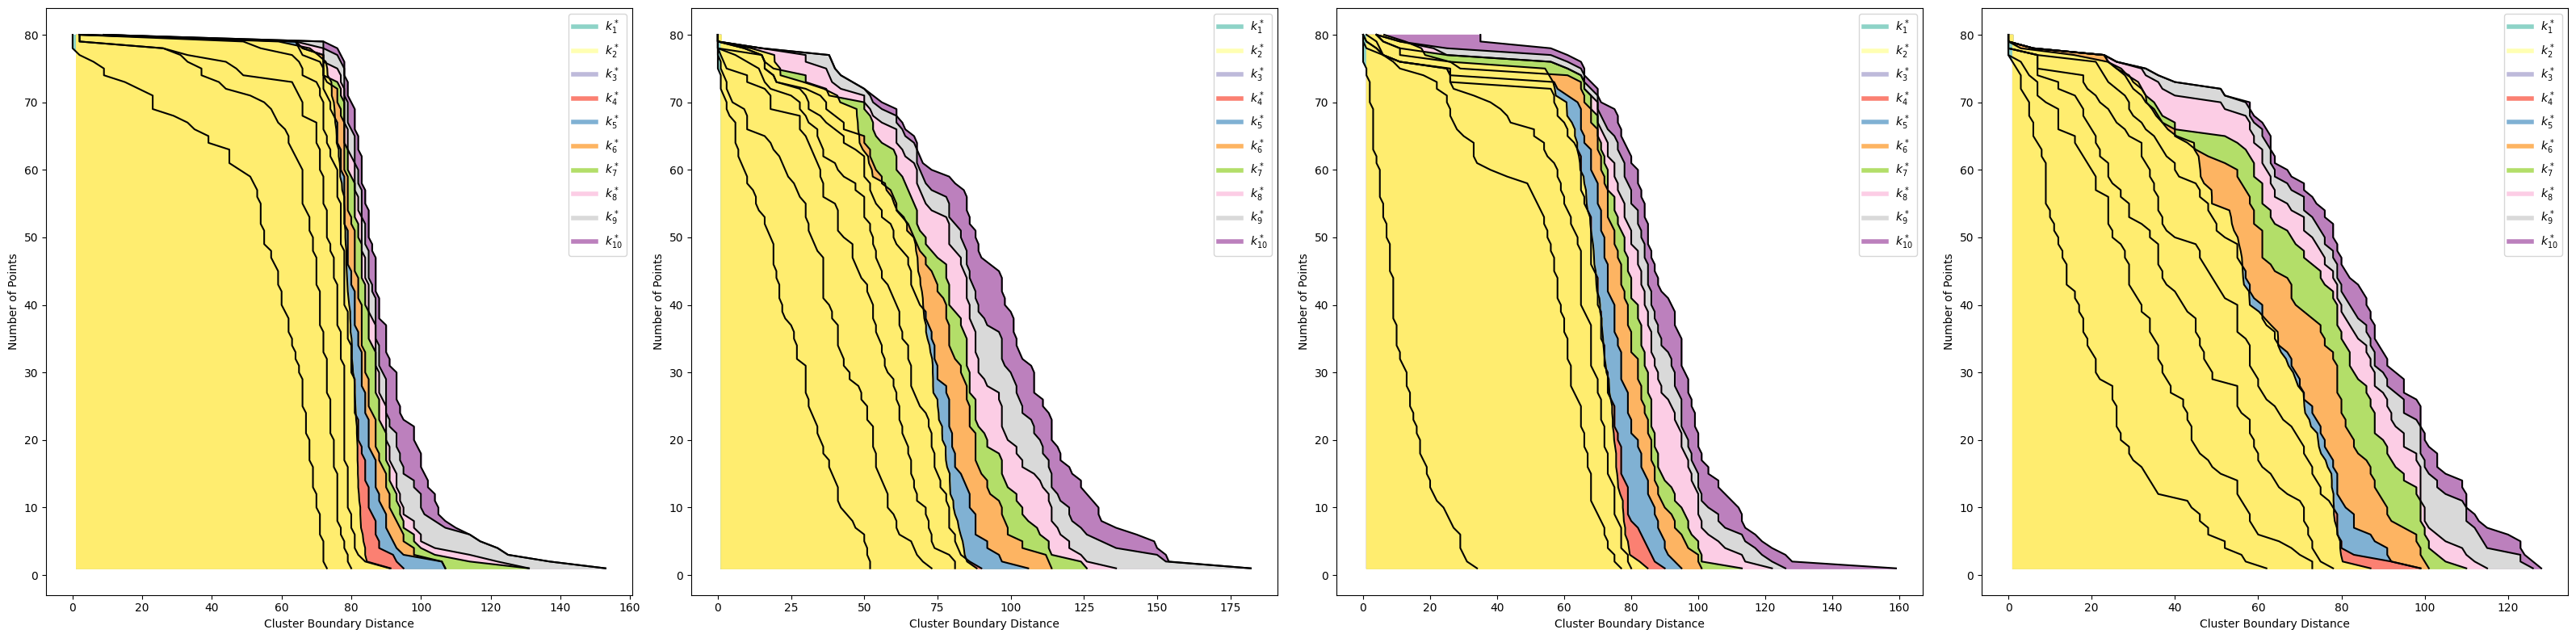

In [55]:
model_names = ["resnet", "ViT"]
train_names  = ["IN", "SIN"]
test_names   = ["IN", "SIN", "cropIN", "noiseIN", "rotateIN", "cropSIN", "noiseSIN", "rotateSIN"]

for model_name in model_names[:1]:
    for train_name in train_names[:1]:
        for test_name in test_names[:1]:
            run_forAnalysis(test_name, model_name, train_name)
            
            # try:
            #     print(model_name, train_name, test_name)
            #     run(test_name, model_name, train_name)
            # except Exception as e:
            #    print(e)

## Old Code